In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition

# Constants

In [2]:
TOP_N_VALS = 20

# Exploratory Data Analysis

In [3]:
data = pd.read_csv('Purchase_Card_Transactions.csv')

In [4]:
data.head()

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,2,Department of Mental Health,2009/01/05 05:00:00+00,229.50,WW GRAINGER 912,DC,"Industrial Supplies, Not Elsewhere Classified"
1,3,District Department of Transportation,2009/01/05 05:00:00+00,3147.33,BRANCH SUPPLY,DC,"Stationery, Office & School Supply Stores"
2,4,Department of Youth Rehabilitation Services,2009/01/05 05:00:00+00,54.00,VIDEO MONITORING SRVCS,NY,Motion Pictures/Video Tape Production&Distribu...
3,5,Office of Employee Appeals,2009/01/05 05:00:00+00,137.35,STAPLES 00102186,DC,"Stationery,Office Supplies,Printing/Writing Paper"
4,6,Office of Police Complaints,2009/01/06 05:00:00+00,1340.80,FAITH MGMT CONSULTING,DC,"Stationery, Office & School Supply Stores"


In [5]:
data.shape

(433926, 7)

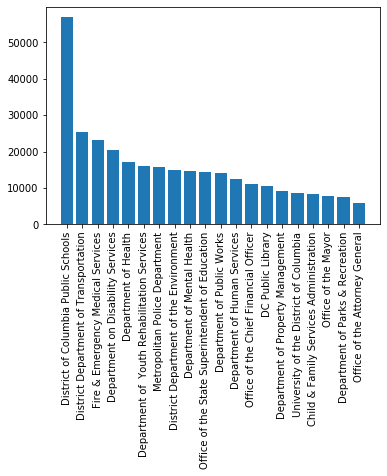

In [6]:
agencies = dict(data.AGENCY.value_counts()[:TOP_N_VALS])
plt.bar(agencies.keys(), height=agencies.values())
plt.xticks(rotation='vertical')
plt.show()

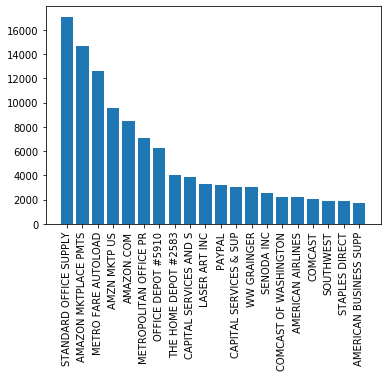

In [7]:
vendors = dict(data.VENDOR_NAME.value_counts()[:TOP_N_VALS])
plt.bar(vendors.keys(), height=vendors.values())
plt.xticks(rotation='vertical')
plt.show()

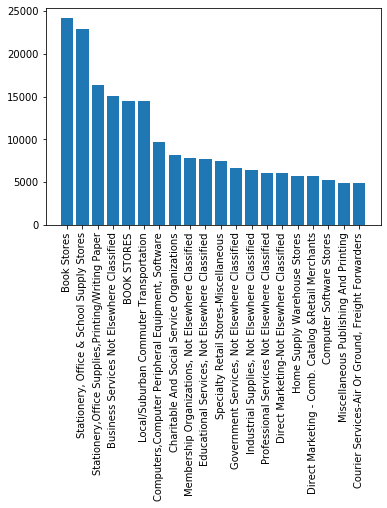

In [8]:
mcc = dict(data.MCC_DESCRIPTION.value_counts()[:TOP_N_VALS])
plt.bar(mcc.keys(), height=mcc.values())
plt.xticks(rotation='vertical')
plt.show()

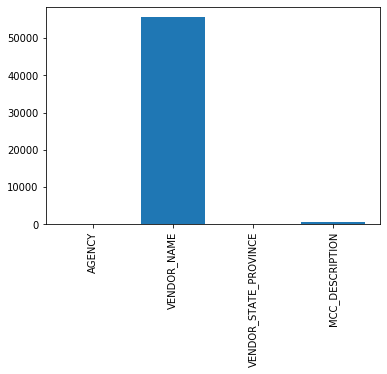

In [9]:
num_categories = {}
category_cols = ['AGENCY', 'VENDOR_NAME', 'VENDOR_STATE_PROVINCE', 'MCC_DESCRIPTION']
for col in category_cols:
    num_categories[col] = data[col].nunique()
plt.bar(num_categories.keys(), height=num_categories.values())
plt.xticks(rotation='vertical')
plt.show()

(array([3.38727e+05, 4.44950e+04, 2.19660e+04, 4.88000e+03, 4.55000e+03,
        8.95000e+02, 1.54000e+02, 7.90000e+01, 6.80000e+01, 1.30000e+02]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

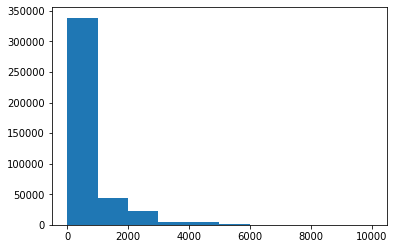

In [10]:
plt.hist(data.TRANSACTION_AMOUNT, range = (0, 10000))

(array([121074.,  61705.,  40097.,  30216.,  22896.,  19004.,  14172.,
         11732.,   9426.,   9573.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

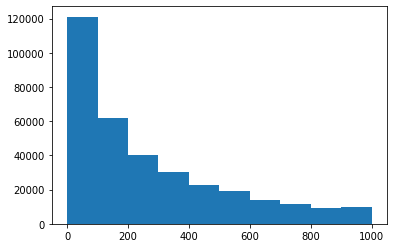

In [11]:
plt.hist(data.TRANSACTION_AMOUNT, range = (0, 1000))

In [12]:
data[data.TRANSACTION_AMOUNT < 0]

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
101,289,Office of Police Complaints,2009/01/08 05:00:00+00,-79.95,CAPITAL SERVICES AND S,DC,Office and Commercial Furniture
187,65,Department of Health,2009/01/06 05:00:00+00,-464.48,PRESSTEK,NH,"Commercial Photography, Art & Graphics"
204,82,Department of Property Management,2009/01/06 05:00:00+00,-608.97,IKEA COLLEGE PARK,MD,"Furniture, Home Furnishings And Equipment Stores"
219,97,District Department of the Environment,2009/01/06 05:00:00+00,-39.66,U-STORE WASHINGTON,DC,"Freight Carriers, Trucking - Local/Long Distance"
227,105,Department of Corrections,2009/01/07 05:00:00+00,-48.62,HMCO ECMMRCE* BOOKS,IL,Direct Marketing-Not Elsewhere Classified
...,...,...,...,...,...,...,...
433868,433869,Department of Human Services,2020/10/27 04:00:00+00,-12.24,"WIX.COM, INC.",CA,COMPUTER SOFTWARE STORES
433895,433896,District Department of Transportation,2020/06/02 04:00:00+00,-1995.00,EB JULY 2020 EXECUTIV,CA,BUSINESS SERVICES-NOT ELSEWHERE CLASSIFIED
433897,433898,Office of Contracting & Procurement,2020/06/03 04:00:00+00,-2160.12,DISPUTE CREDIT,IL,OFFICE SCHOOL SUPPLY AND STATIONERY STORES
433902,433903,District of Columbia Public Schools,2020/06/02 04:00:00+00,-34.44,STAPLES 00115170,MD,OFFICE SCHOOL SUPPLY AND STATIONERY STORES


In [13]:
data[data.TRANSACTION_AMOUNT > 100000]

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
112441,112263,Office of Contracting & Procurement,2012/07/17 04:00:00+00,100411.0,FORT MYER CONSTRUCTION,DC,"Genl Contractors-Residential, and Commercial"
129248,129137,Office of Contracting & Procurement,2013/01/08 05:00:00+00,143500.0,JIMMIE MUSCATELLOS,DC,Uniforms and Commercial Clothing
219756,219964,Office of Contracting & Procurement,2016/02/04 05:00:00+00,150247.5,"C.W. STRITTMATTER, INC",VA,"Rentals-Tools, Equipment and Furniture"
219761,219969,Office of Contracting & Procurement,2016/02/04 05:00:00+00,400085.0,"C.W. STRITTMATTER, INC",VA,"Rentals-Tools, Equipment and Furniture"
220836,220805,Office of Contracting & Procurement,2016/02/03 05:00:00+00,124464.0,HURB LANDSCAPING,NY,"Nurseries, Lawn & Garden Supply Stores"
...,...,...,...,...,...,...,...
235531,235567,Office of Contracting & Procurement,2016/03/06 05:00:00+00,233100.0,NORTHEAST SNOWPLOW,CT,Landscaping And Horticultural Services
235532,235568,Office of Contracting & Procurement,2016/03/04 05:00:00+00,274620.0,"C.W. STRITTMATTER, INC",VA,"Rentals-Tools, Equipment and Furniture"
249536,249863,Office of Contracting & Procurement,2016/04/19 04:00:00+00,545197.5,CAPITOL PAVING OF DC I,DC,"Special Trade Contractors,Not Elsewhere Classi..."
249537,249864,Office of Contracting & Procurement,2016/04/20 04:00:00+00,388550.0,CAPITOL PAVING OF DC I,DC,"Special Trade Contractors,Not Elsewhere Classi..."


In [14]:
set(data.AGENCY.unique()).intersection(data.VENDOR_NAME.unique())

set()

In [15]:
data.MCC_DESCRIPTION.unique()

array(['Industrial Supplies, Not Elsewhere Classified',
       'Stationery, Office & School Supply Stores',
       'Motion Pictures/Video Tape Production&Distribution',
       'Stationery,Office Supplies,Printing/Writing Paper',
       'Business Services Not Elsewhere Classified',
       'Professional Services Not Elsewhere Defined',
       'General Merchandise', 'Automobile & Truck Dealer - New & Used',
       'Book Stores',
       'Membership Organizations, Not Elsewhere Classified',
       'Quick-Copy, Reproduction and Blueprinting Services',
       'Computers,Computer Peripheral Equipment, Software',
       'Computer Software Stores', 'Office and Commercial Furniture',
       'Educational Services, Not Elsewhere Classified',
       'Books, Periodicals And Newspapers',
       'Hotels-Lodging (Not Listed Elsewhere)',
       'Specialty Retail Stores-Miscellaneous', 'Hardware Stores',
       'Electrical Contractors', 'Commercial Photography, Art & Graphics',
       'Direct Marketing - 

# Cleaning the Dataset

In [16]:
data[data.VENDOR_STATE_PROVINCE.isna()]

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
77,265,Fire & Emergency Medical Services,2009/01/09 05:00:00+00,0.42,INTERNATIONAL TRANSACTION,NaN,Unknown
78,266,Fire & Emergency Medical Services,2009/01/09 05:00:00+00,42.36,WWW.NCHSOFTWARE.COM,NaN,Computer Software Stores
864,617,District Department of the Environment,2009/01/13 05:00:00+00,0.82,INTERNATIONAL TRANSACTION,NaN,Unknown
1436,1495,Fire & Emergency Medical Services,2009/01/23 05:00:00+00,0.75,INTERNATIONAL TRANSACTION,NaN,Unknown
1437,1496,Fire & Emergency Medical Services,2009/01/23 05:00:00+00,75.03,WWW.NCHSOFTWARE.COM,NaN,Computer Software Stores
...,...,...,...,...,...,...,...
432044,432158,Department of Mental Health,2020/03/17 04:00:00+00,2301.14,DENTAL IMG DBA ISI/GEN,NaN,DENTAL-LAB-MED-OPHTHALMIC HOSP EQUIP + SUPPLIES
432141,432192,OFFICE OF PEOPLE'S COUNSEL,2020/03/21 04:00:00+00,713.04,CISCO SYSTEMS INC,NaN,ELECTRONIC SALES
432655,432789,Department of Health,2020/03/11 04:00:00+00,2008.12,MORTECH MANUFACTURING,NaN,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED
433457,433360,Department of Public Works,2020/02/21 05:00:00+00,250.00,REMCO BUSIN,NaN,OFFICE AND COMMERCIAL FURNITURE


In [17]:
data[data.AGENCY.isna()]

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION


In [18]:
data[data.VENDOR_NAME.isna()]

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
2031,2032,Department of Human Services,2009/02/04 05:00:00+00,128.98,NaN,NaN,Unknown Vendor
2254,2444,DC Public Library,2009/02/05 05:00:00+00,119.04,NaN,NaN,Unknown Vendor
2259,2449,DC Public Library,2009/02/05 05:00:00+00,222.81,NaN,NaN,Unknown Vendor
2329,2209,Fire & Emergency Medical Services,2009/02/08 05:00:00+00,750.91,NaN,NaN,Unknown Vendor
2331,2211,Fire & Emergency Medical Services,2009/02/07 05:00:00+00,168.37,NaN,NaN,Unknown Vendor
2398,2278,Fire & Emergency Medical Services,2009/02/06 05:00:00+00,355.82,NaN,NaN,Unknown Vendor
2702,2738,Department of Health,2009/02/09 05:00:00+00,210.00,NaN,NaN,Unknown Vendor
2836,2556,Department on Disability Services,2009/02/10 05:00:00+00,148.49,NaN,NaN,Unknown Vendor
2916,2636,Department of Human Services,2009/02/11 05:00:00+00,148.07,NaN,NaN,Unknown Vendor
65511,65940,University of the District of Columbia,2011/02/10 05:00:00+00,1300.00,NaN,NaN,NaN


In [19]:
data[data.TRANSACTION_AMOUNT.isna()]

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION


In [20]:
cleaned_data = data[data.VENDOR_NAME.notna()]
cleaned_data = cleaned_data[data.TRANSACTION_AMOUNT >= 0]

C:\Users\Srivinay Tummarakota\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [21]:
agencies = sorted(cleaned_data.AGENCY.unique())
vendors = sorted(cleaned_data.VENDOR_NAME.unique())
industries = sorted(cleaned_data.MCC_DESCRIPTION.unique())
agency_ids = {}
vendor_ids = {}
industry_ids = {}
for i in range(len(agencies)):
    agency_ids[agencies[i]] = i
for i in range(len(vendors)):
    vendor_ids[vendors[i]] = i
for i in range(len(industries)):
    industry_ids[industries[i]] = i

In [22]:
cleaned_data['AGENCY_ID'] = [agency_ids[agency] for agency in cleaned_data.AGENCY]
cleaned_data['VENDOR_ID'] = [vendor_ids[vendor] for vendor in cleaned_data.VENDOR_NAME]
cleaned_data['INDUSTRY_ID'] = [industry_ids[industry] for industry in cleaned_data.MCC_DESCRIPTION]

In [23]:
cleaned_data.to_csv('cleaned_data.csv')

In [24]:
cleaned_data = cleaned_data[["AGENCY_ID", "TRANSACTION_AMOUNT", "VENDOR_ID"]]

In [25]:
cleaned_data.head()

,AGENCY_ID,TRANSACTION_AMOUNT,VENDOR_ID
0,34,229.50,54485
1,43,3147.33,9435
2,24,54.00,52842
3,59,137.35,45199
4,67,1340.80,18299


In [26]:
cleaned_data.shape

(416233, 3)

In [27]:
def convert_to_matrix(df, rows, cols):
    matrix = [[0 for i in range(len(cols))] for j in range(len(rows))]
    for idx in df.index:
        matrix[idx[0]][idx[1]] = df.loc[idx].TRANSACTION_AMOUNT
    return matrix 

### Average Transactions Matrix

In [28]:
means = cleaned_data.groupby(['AGENCY_ID', 'VENDOR_ID']).mean()
means_matrix = convert_to_matrix(means, agency_ids.values(), vendor_ids.values())
means_df = pd.DataFrame(means_matrix)
means_df.to_csv('means.csv')

### Raw Number of Transactions Matrix

In [29]:
counts = cleaned_data.groupby(['AGENCY_ID', 'VENDOR_ID']).count()
counts_matrix = convert_to_matrix(counts, agency_ids.values(), vendor_ids.values())
counts_df = pd.DataFrame(counts_matrix)
counts_df.to_csv('counts.csv')

### Sum of Transactions Matrix

In [30]:
sums = cleaned_data.groupby(['AGENCY_ID', 'VENDOR_ID']).sum()
sums_matrix = convert_to_matrix(sums, agency_ids.values(), vendor_ids.values())
sums_df = pd.DataFrame(sums_matrix)
sums_df.to_csv('sums.csv')